## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
data = pd.read_csv('Heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Analysing the Data

In [3]:
data.shape

(1025, 14)

In [4]:
# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [10]:
data['target'].value_counts()
# 1 represents a defective heart
# 0 represents healthy heart

1    526
0    499
Name: target, dtype: int64

In [11]:
data['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [12]:
data['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [13]:
data['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

Text(0.5, 1.0, 'Distribution of Age')

<Figure size 800x800 with 0 Axes>

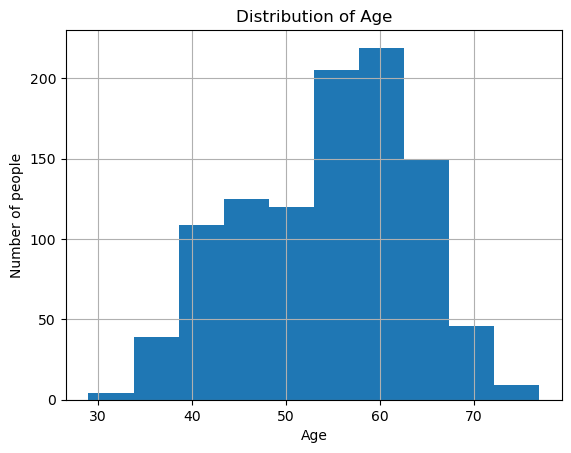

In [14]:
plt.figure(figsize=(8,8))
data.hist(column ='age')
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")

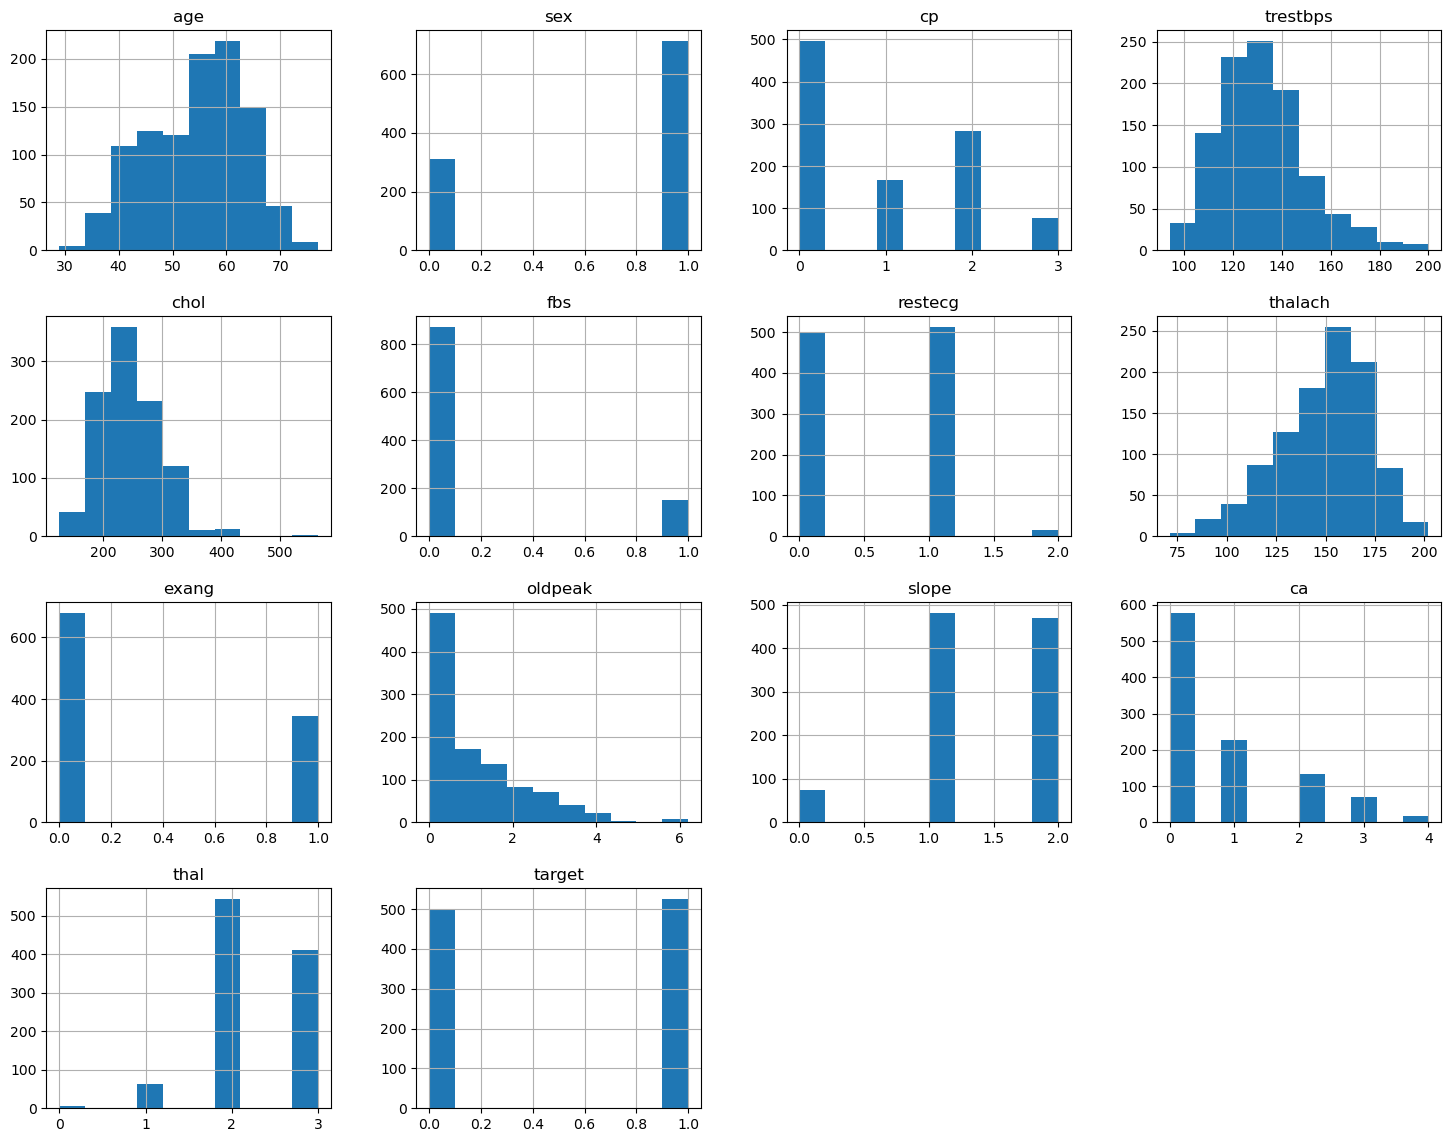

In [15]:
data.hist(figsize=(18,14));

<AxesSubplot:>

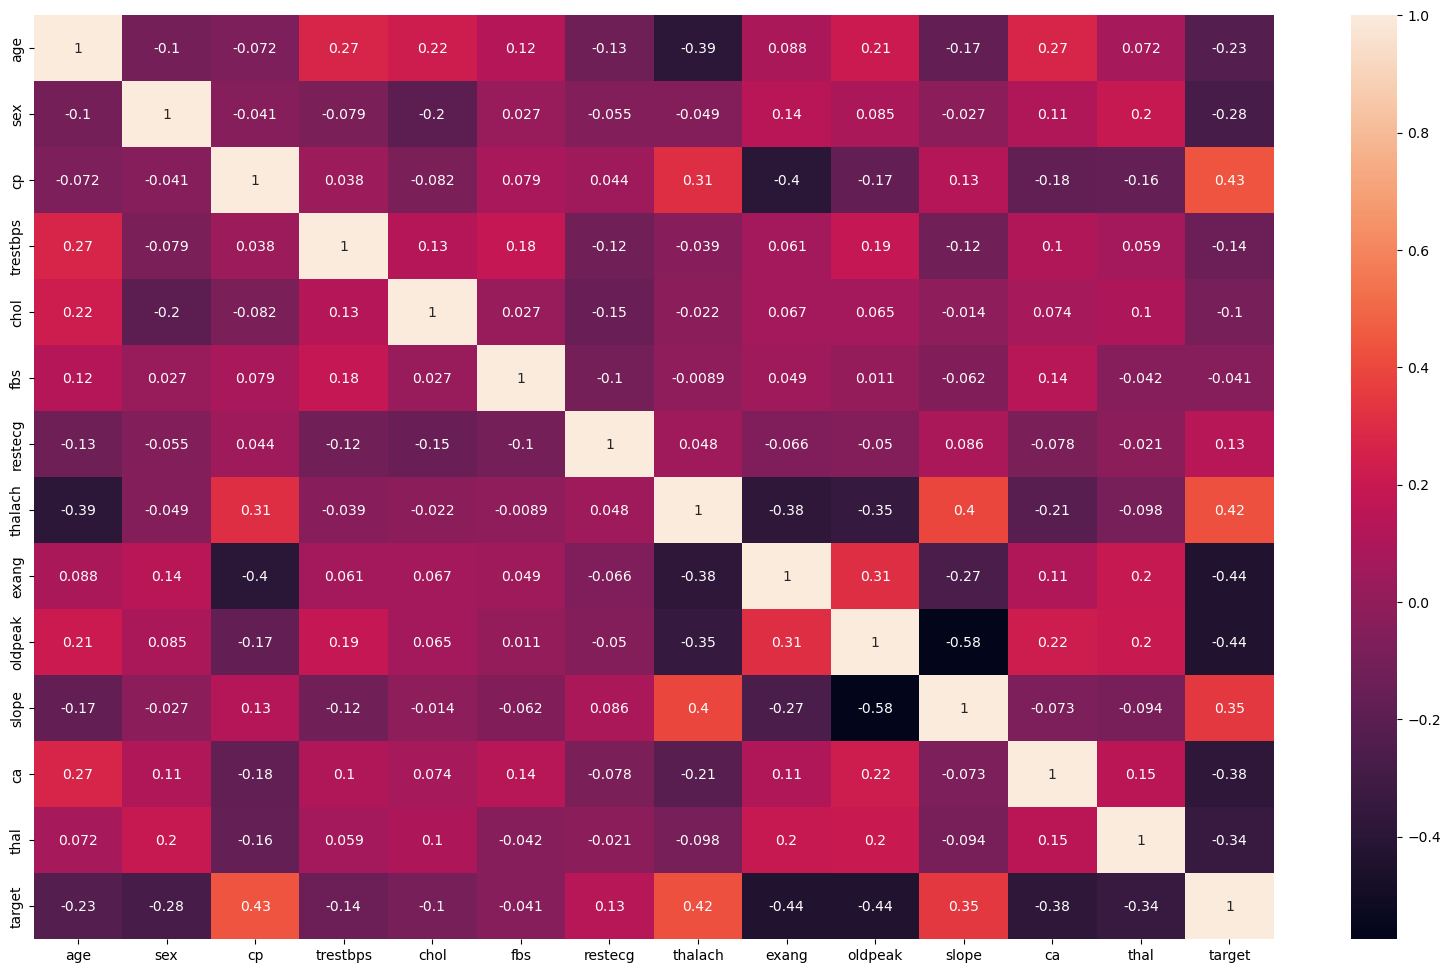

In [16]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

## Splitting the Dataset into Dependent and Independent variables

In [17]:
X = data.drop('target',axis=1)
y = data['target']

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Splitting the Dataset into Training and Testing Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2)

## Importing Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

In [23]:
m1.fit(X_train,y_train)

C:\Users\prajw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
print("Training Score is ", m1.score(X_train,y_train))
print("Testing Score is ", m1.score(X_test,y_test))

Training Score is  0.848780487804878
Testing Score is  0.8682926829268293


In [25]:
y_pred = m1.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print("Accuracy is ", accuracy_score(y_pred, y_test))

Accuracy is  0.8682926829268293


In [28]:
y_pred_train = m1.predict(X_train)
print("Accuracy is ", accuracy_score(y_pred_train, y_train))

Accuracy is  0.848780487804878


## Building a Prediction System

### We pass data from the dataset and finally validate the prediction of the model

In [41]:
input_data = (70,1,0,145,174,0,1,125,1,2.6,0,0,3)
# input_data = (34,0,1,118,210,0,1,192,0,0.7,2,0,2)
data_array = np.asarray(input_data)
new_data = data_array.reshape(1,-1)
prediction = m1.predict(new_data)
if prediction[0] == 0:
    print("The person does not have any Heart Disease")
else:
    print("The person has Heart Disease")

The person does not have any Heart Disease


C:\Users\prajw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
print(prediction)

[0]
